In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import os

In [3]:
all_files = sorted(os.listdir('/data/rl/madrona_3d_example/data_dump/default/'))

In [86]:
all_files

['2023-10-10 01:40:04.449994.pt',
 '2023-10-10 01:40:07.832613.pt',
 '2023-10-10 01:40:13.133922.pt',
 '2023-10-10 01:40:14.656466.pt',
 '2023-10-10 01:40:25.177304.pt',
 '2023-10-10 01:41:06.230997.pt',
 '2023-10-10 01:41:15.076119.pt',
 '2023-10-10 01:41:25.261416.pt',
 '2023-10-10 01:41:28.840324.pt',
 '2023-10-10 01:41:46.325236.pt',
 '2023-10-10 01:42:06.533468.pt',
 '2023-10-10 01:42:23.491634.pt',
 '2023-10-10 01:42:36.430380.pt',
 '2023-10-10 01:42:42.691514.pt',
 '2023-10-10 01:42:53.686913.pt',
 '2023-10-10 01:42:55.280793.pt',
 '2023-10-10 01:43:03.573464.pt',
 '2023-10-10 01:43:15.222842.pt',
 '2023-10-10 01:43:16.810533.pt',
 '2023-10-10 01:43:33.866297.pt',
 '2023-10-10 01:43:36.117374.pt',
 '2023-10-10 01:43:39.073199.pt',
 '2023-10-10 01:43:40.730929.pt',
 '2023-10-10 01:43:53.683908.pt',
 '2023-10-10 01:44:16.038219.pt',
 '2023-10-10 01:44:16.965322.pt',
 '2023-10-10 01:44:17.904109.pt',
 '2023-10-10 01:44:24.201398.pt',
 '2023-10-10 01:45:14.743965.pt',
 '2023-10-10 0

In [84]:
len(all_files)

519

In [88]:
root_path = '/data/rl/madrona_3d_example/data_dump/default/'
all_rollouts = []
for file in all_files[::30]:
    all_rollouts.append(torch.load(root_path + file))

Top-level structure
obs_tensors = [
        self_obs_tensor.view(batch_size, *self_obs_tensor.shape[2:]),
        partner_obs_tensor.view(batch_size, *partner_obs_tensor.shape[2:]),
        room_ent_obs_tensor.view(batch_size, *room_ent_obs_tensor.shape[2:]),
        door_obs_tensor.view(batch_size, *door_obs_tensor.shape[2:]),
        lidar_tensor.view(batch_size, *lidar_tensor.shape[2:]),
        steps_remaining_tensor.view(batch_size, *steps_remaining_tensor.shape[2:]),
        id_tensor,
    ]


In [89]:
len(all_rollouts[-1].obs) # 

7

In [90]:
all_rollouts[-1].obs[0].shape # 8, 5, 16384, 8: 8 bptt chunks, 5 steps per bptt chunk, 16384 environments, 8 SelfObs

torch.Size([8, 5, 16384, 8])

In [91]:
print(all_rollouts[-1].obs[0][:,0,0,2:5])

tensor([[-0.0823,  1.0539,  0.0000],
        [-0.0721,  1.1100,  0.0000],
        [-0.0768,  1.1737,  0.0000],
        [-0.0636,  1.2317,  0.0000],
        [-0.0570,  1.2931,  0.0000],
        [-0.0456,  1.3405,  0.0000],
        [-0.0741,  1.4274,  0.0000],
        [-0.1030,  1.5023,  0.0000]], device='cuda:0')


In [92]:
print(all_rollouts[-1].obs[0][:,0,4,2:5])

tensor([[-4.7337e-02,  8.8749e-01,  2.1256e-03],
        [-1.2787e-01,  9.3282e-01,  0.0000e+00],
        [-1.4892e-01,  9.1728e-01,  0.0000e+00],
        [-7.0138e-02,  9.4162e-01,  0.0000e+00],
        [-4.7424e-02,  9.9368e-01,  0.0000e+00],
        [-2.6107e-02,  1.0568e+00,  0.0000e+00],
        [-7.6085e-04,  1.1065e+00,  0.0000e+00],
        [-2.6670e-02,  1.1625e+00,  0.0000e+00]], device='cuda:0')


## Try plotting this

In [61]:
import matplotlib.pyplot as plt

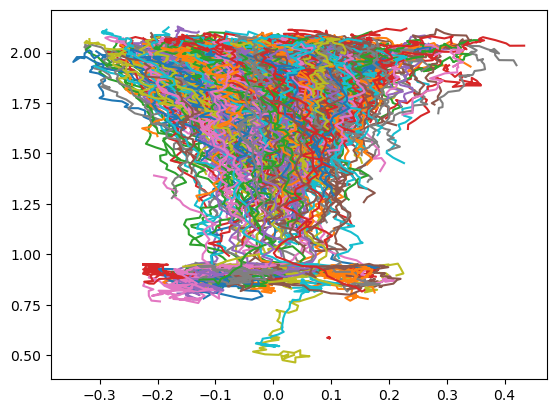

In [62]:
for i in range(1000):
    plt.plot(all_rollouts[-1].obs[0][:,:,i,2].cpu().reshape(-1), all_rollouts[-1].obs[0][:,:,i,3].cpu().reshape(-1))

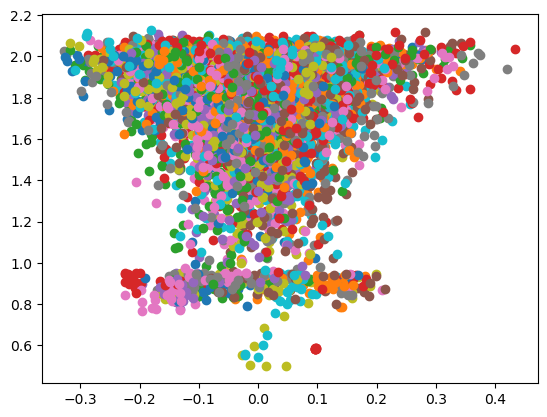

In [63]:
for i in range(1000):
    plt.scatter(all_rollouts[-1].obs[0][:,4,i,2].cpu(), all_rollouts[-1].obs[0][:,4,i,3].cpu())

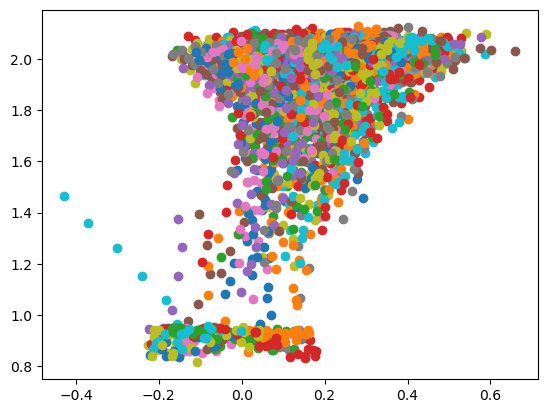

In [64]:
for i in range(1000):
    plt.scatter(all_rollouts[0].obs[0][:,4,i,2].cpu(), all_rollouts[0].obs[0][:,4,i,3].cpu())

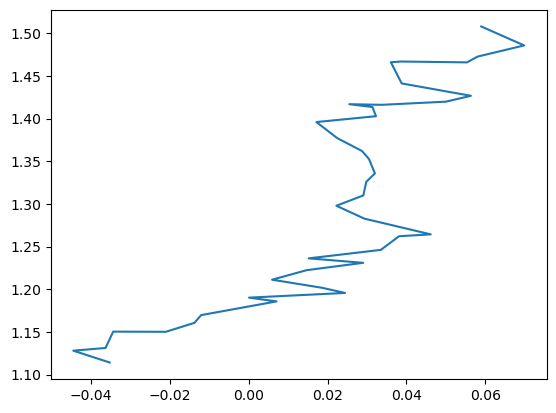

In [65]:
for i in range(1):
    plt.plot(all_rollouts[-3].obs[0][:,:,i,2].cpu().reshape(-1), all_rollouts[-3].obs[0][:,:,i,3].cpu().reshape(-1))
    #plt.plot(all_rollouts[-2].obs[0][:,:,i,2].cpu().reshape(-1), all_rollouts[-2].obs[0][:,:,i,3].cpu().reshape(-1))
    #plt.plot(all_rollouts[-1].obs[0][:,:,i,2].cpu().reshape(-1), all_rollouts[-1].obs[0][:,:,i,3].cpu().reshape(-1))

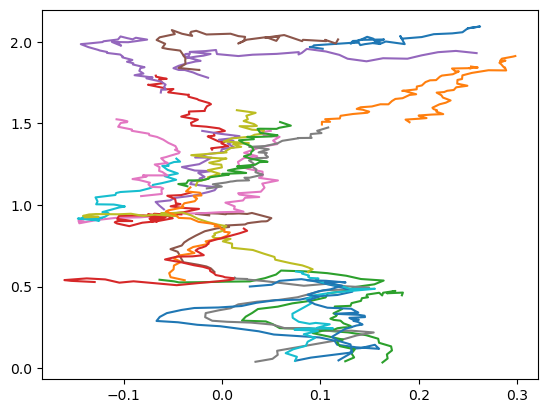

In [66]:
for i in range(1):
    for j in range(len(all_rollouts)):
        plt.plot(all_rollouts[j].obs[0][:,:,i,2].cpu().reshape(-1), all_rollouts[j].obs[0][:,:,i,3].cpu().reshape(-1))

## Try out a heatmap

In [67]:
test_data = all_rollouts[-1].obs[0][:,0,0,2:4].cpu()

In [68]:
test_data = torch.round(test_data*100)

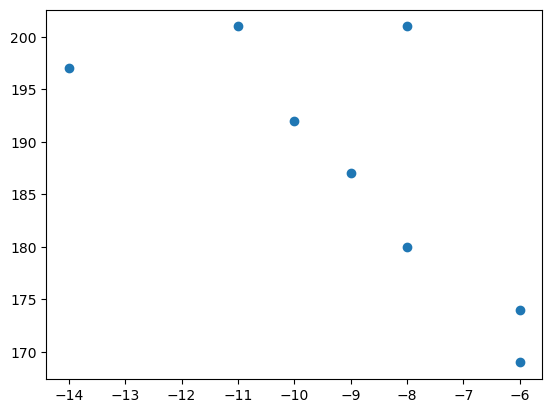

In [69]:
plt.scatter(test_data[:,0],test_data[:,1])

In [70]:
x_data = torch.round(all_rollouts[-1].obs[0][:,:,:,2].cpu().flatten()*100)

In [71]:
y_data = torch.round(all_rollouts[-1].obs[0][:,:,:,3].cpu().flatten()*100)

In [72]:
positions, counts = torch.unique(torch.stack([x_data,y_data]),dim=-1,return_counts=True)

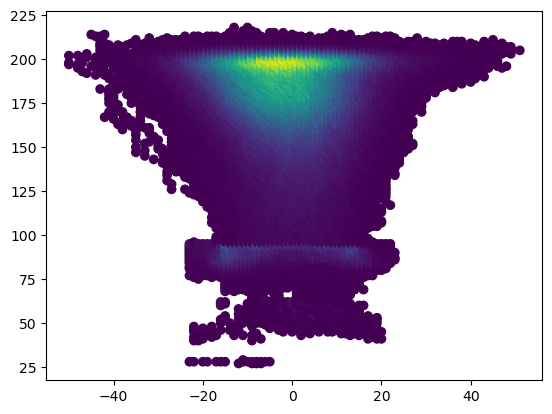

In [73]:
plt.scatter(positions[0], positions[1], c = counts)

In [74]:
x_data = torch.round(all_rollouts[-1].obs[0][:,:,:,2].cpu().flatten()*100)

In [75]:
y_data = torch.round(all_rollouts[-1].obs[0][:,:,:,3].cpu().flatten()*50)

In [76]:
positions, counts = torch.unique(torch.stack([x_data,y_data]),dim=-1,return_counts=True)

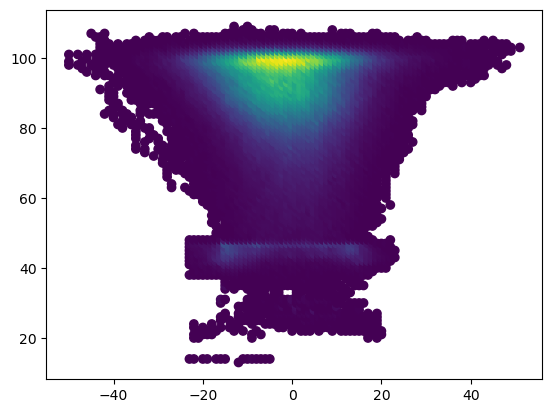

In [77]:
plt.scatter(positions[0], positions[1], c = counts)

# Understand other positions in the state

In [78]:
all_rollouts[-1].obs[0].shape # Self obs

torch.Size([8, 5, 16384, 8])

In [79]:
all_rollouts[-1].obs[1].shape # Partner obs: polar direction of partner [0,1], boolean of whether or not the partner is grabbing block [2]

torch.Size([8, 5, 16384, 1, 3])

In [42]:
all_rollouts[-1].obs[2].shape # Room ent obs: a list of objects, with polar direction of partner [0,1] and enum of object type [2]

torch.Size([8, 5, 16384, 6, 3])

In [44]:
all_rollouts[-1].obs[3].shape # Door obs: polar direction of door [0,1], boolean of whether or not the door is open

torch.Size([8, 5, 16384, 3])

In [46]:
all_rollouts[-1].obs[4].shape # Lidar

torch.Size([8, 5, 16384, 30, 2])

In [45]:
all_rollouts[-1].obs[3][0,:,0,:]

tensor([[ 0.1895, -0.7832,  0.0000],
        [ 0.1866, -0.7455,  0.0000],
        [ 0.1948, -0.7251,  0.0000],
        [ 0.2060, -0.7401,  0.0000],
        [ 0.1916, -0.6551,  0.0000]], device='cuda:0')

# Start plotting value function

In [80]:
all_rollouts[-1].values.shape

torch.Size([8, 5, 16384, 1])

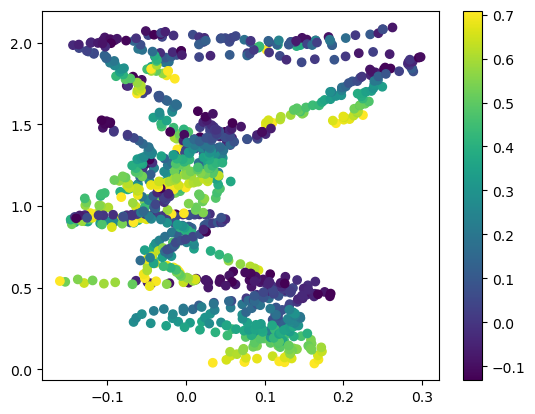

In [81]:
for i in range(1):
    for j in range(len(all_rollouts)):
        plt.scatter(all_rollouts[j].obs[0][:,:,i,2].cpu().reshape(-1), all_rollouts[j].obs[0][:,:,i,3].cpu().reshape(-1), c=all_rollouts[j].values[:,:,i].cpu().reshape(-1))
plt.colorbar()

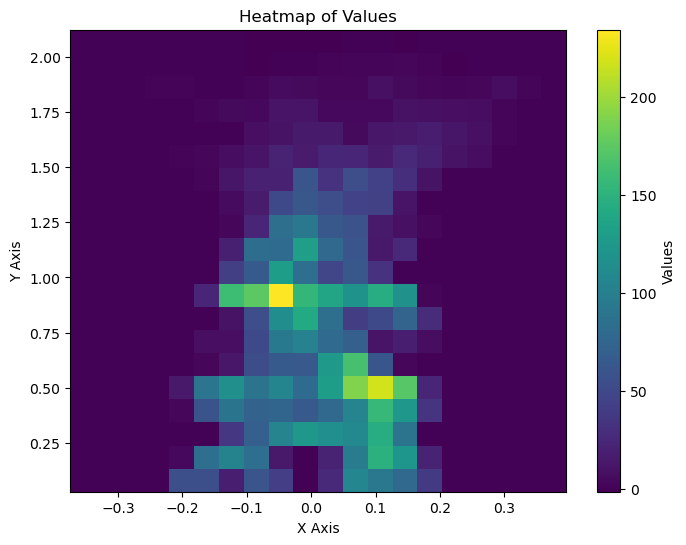

In [82]:
import matplotlib.pyplot as plt

# Assuming you have 'all_rollouts' containing your data
# Assuming 'all_rollouts' is a list of objects with the structure as mentioned in your code

# Extract data for plotting
x_data = []
y_data = []
values = []

for i in range(5):
    for j in range(len(all_rollouts)):
        x_data.extend(all_rollouts[j].obs[0][:, :, i, 2].cpu().reshape(-1))
        y_data.extend(all_rollouts[j].obs[0][:, :, i, 3].cpu().reshape(-1))
        values.extend(all_rollouts[j].values[:, :, i].cpu().reshape(-1))

# Create a 2D histogram (heatmap)
plt.figure(figsize=(8, 6))
plt.hist2d(x_data, y_data, bins=20, weights=values, cmap='viridis')  # You can adjust the number of bins and the colormap
plt.colorbar(label='Values')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Heatmap of Values')
plt.show()

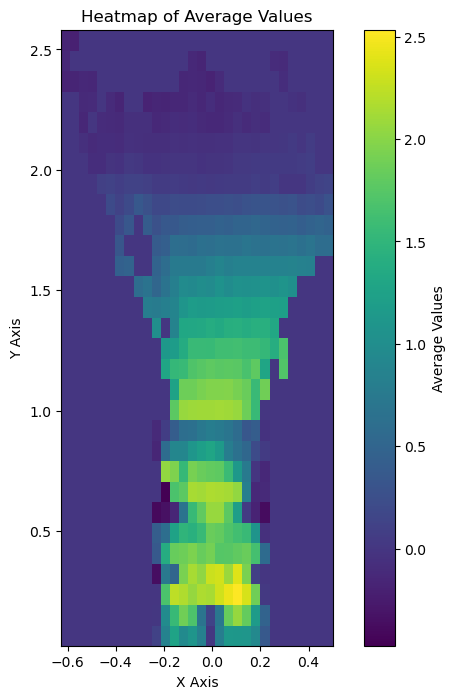

In [97]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 'all_rollouts' containing your data
# Assuming 'all_rollouts' is a list of objects with the structure as mentioned in your code

# Extract data for plotting
x_data = []
y_data = []
values = []

for i in range(100):
    for j in range(len(all_rollouts)):
        x_data.extend(all_rollouts[j].obs[0][:, :, i, 2].cpu().reshape(-1))
        y_data.extend(all_rollouts[j].obs[0][:, :, i, 3].cpu().reshape(-1))
        values.extend(all_rollouts[j].values[:, :, i].cpu().reshape(-1))

# Create a 2D histogram (heatmap)
nbins = 30
heatmap, xedges, yedges = np.histogram2d(x_data, y_data, bins=nbins, weights=values)

# Compute average values per bin
counts, _, _ = np.histogram2d(x_data, y_data, bins=nbins)
average_values = np.divide(heatmap, counts, where=counts != 0)

# Create the heatmap
plt.figure(figsize=(8, 8))
plt.imshow(average_values.T, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], origin='lower', cmap='viridis')
plt.colorbar(label='Average Values')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Heatmap of Average Values')
plt.show()

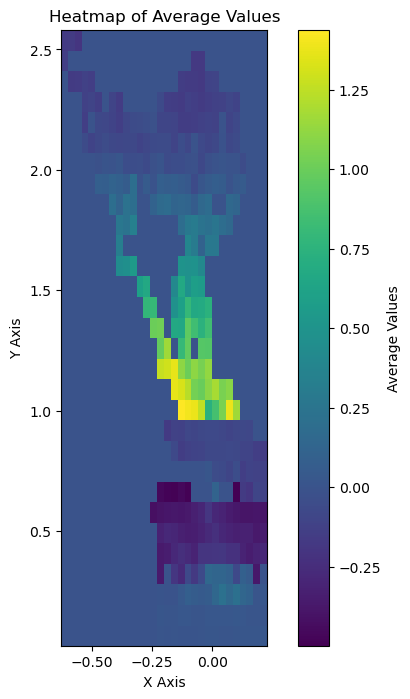

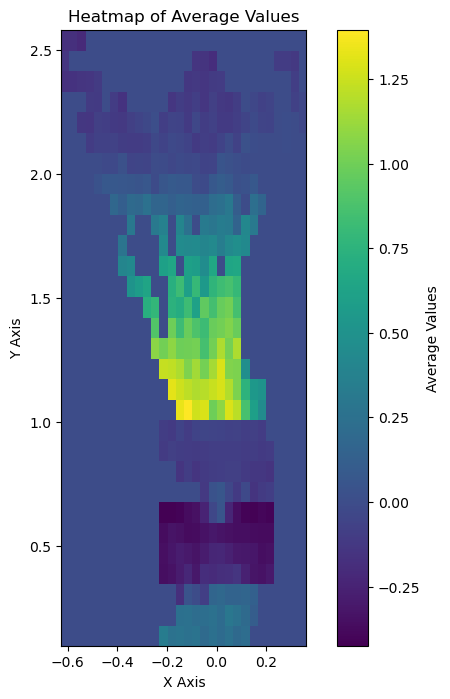

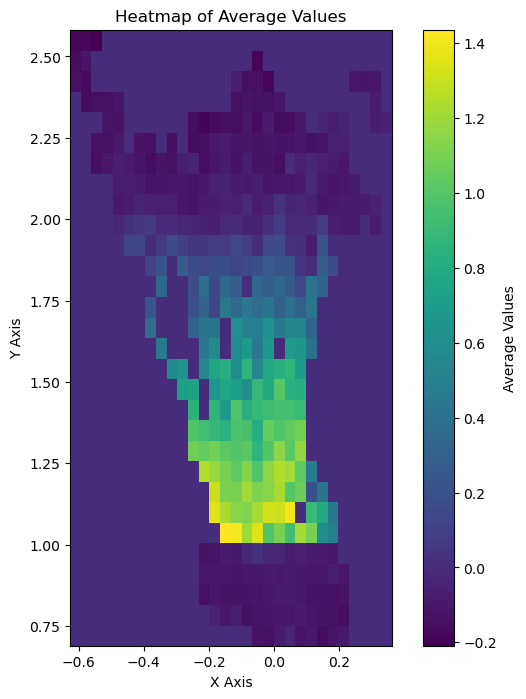

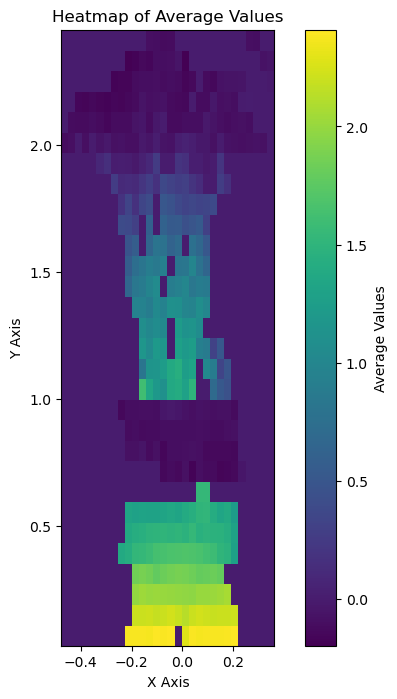

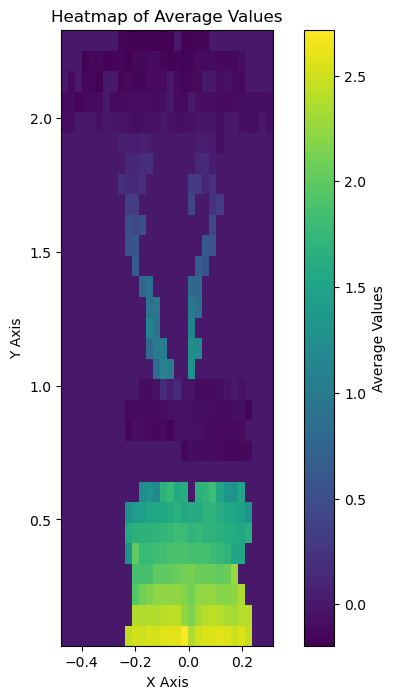

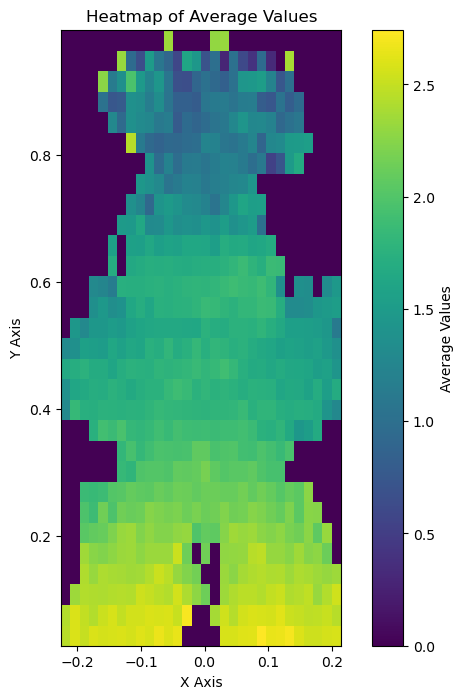

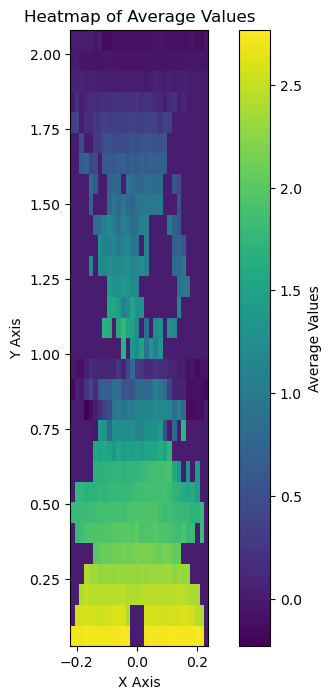

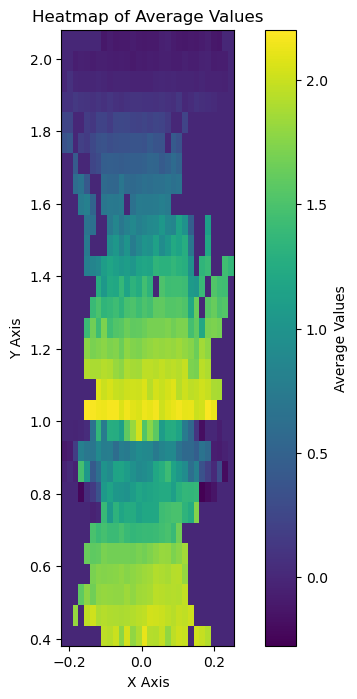

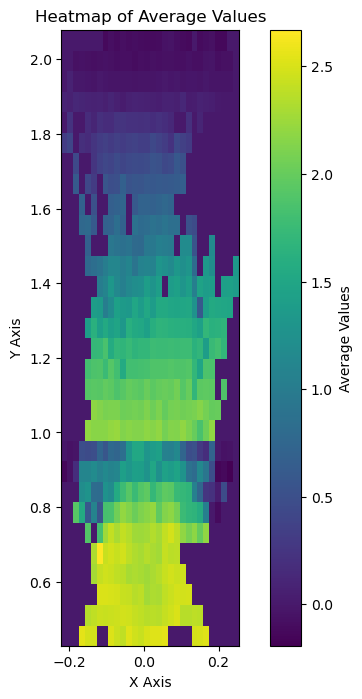

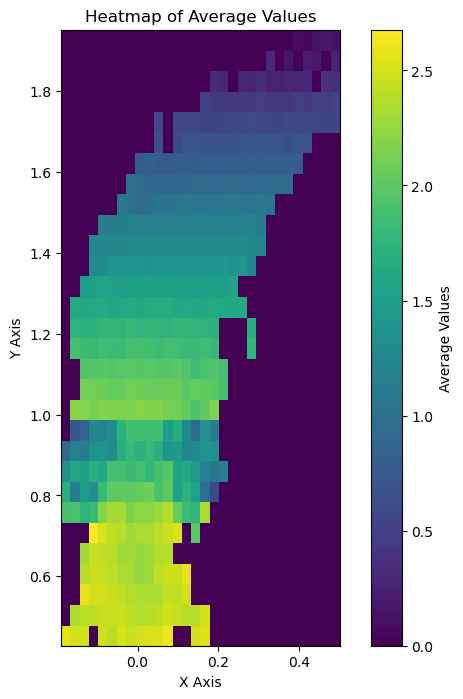

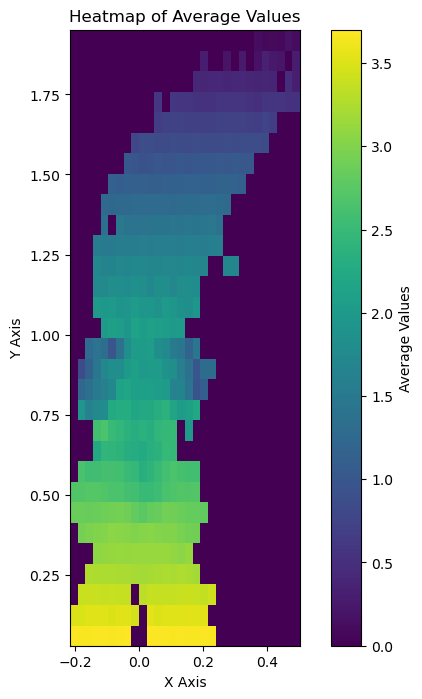

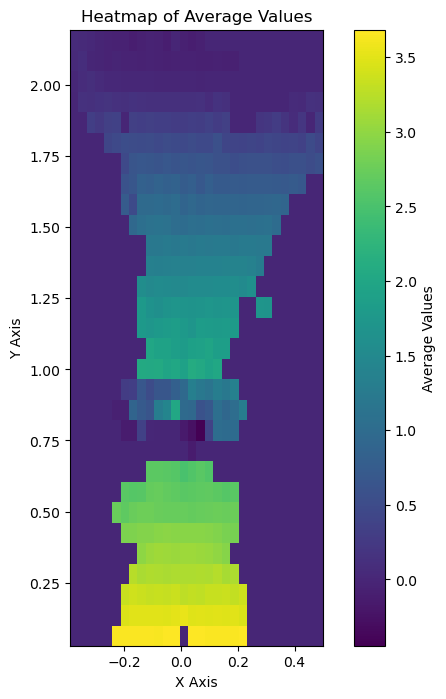

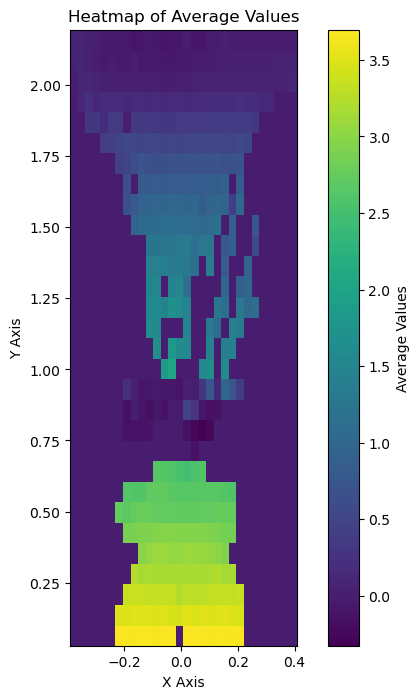

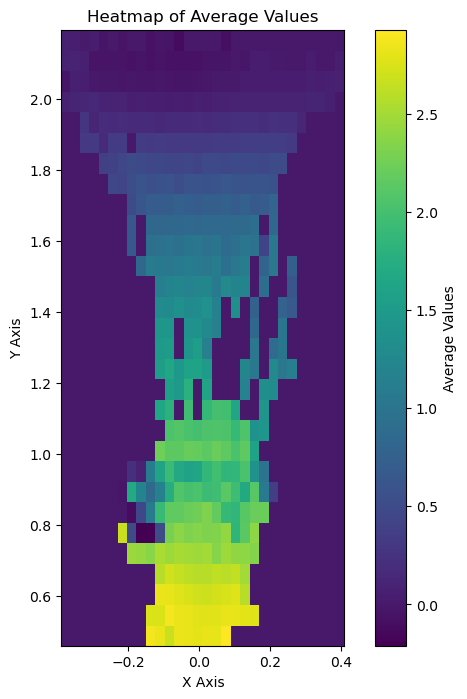

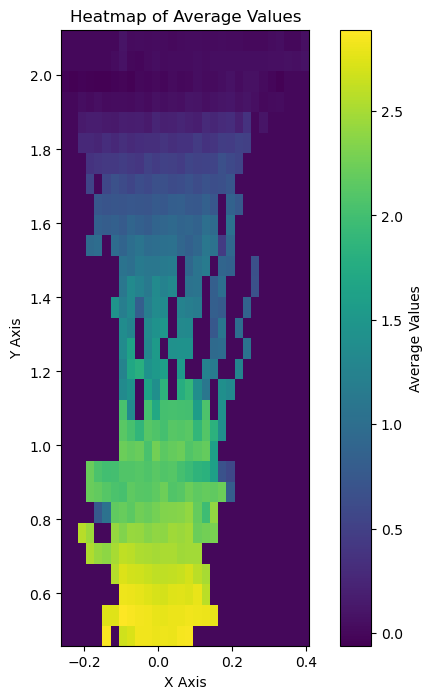

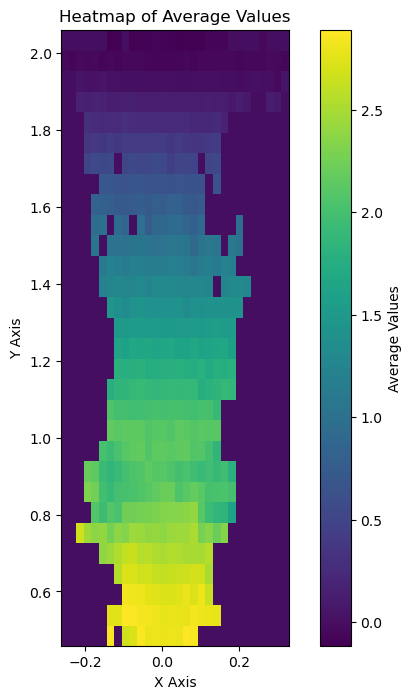

IndexError: list index out of range

In [95]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 'all_rollouts' containing your data
# Assuming 'all_rollouts' is a list of objects with the structure as mentioned in your code

for k in range(len(all_rollouts)):
    # Extract data for plotting
    x_data = []
    y_data = []
    values = []
    
    for i in range(100):
        for j in range(k, k+3):
            x_data.extend(all_rollouts[j].obs[0][:, :, i, 2].cpu().reshape(-1))
            y_data.extend(all_rollouts[j].obs[0][:, :, i, 3].cpu().reshape(-1))
            values.extend(all_rollouts[j].values[:, :, i].cpu().reshape(-1))
    
    # Create a 2D histogram (heatmap)
    nbins = 30
    heatmap, xedges, yedges = np.histogram2d(x_data, y_data, bins=nbins, weights=values)
    
    # Compute average values per bin
    counts, _, _ = np.histogram2d(x_data, y_data, bins=nbins)
    average_values = np.divide(heatmap, counts, where=counts != 0)
    
    # Create the heatmap
    plt.figure(figsize=(8, 8))
    plt.imshow(average_values.T, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], origin='lower', cmap='viridis')
    plt.colorbar(label='Average Values')
    plt.xlabel('X Axis')
    plt.ylabel('Y Axis')
    plt.title('Heatmap of Average Values')
    plt.show()


In [98]:
del all_rollouts

## Early in training

In [10]:
root_path = '/data/rl/madrona_3d_example/data_dump/default/'
all_rollouts = []
for file in all_files[:10]:
    all_rollouts.append(torch.load(root_path + file))

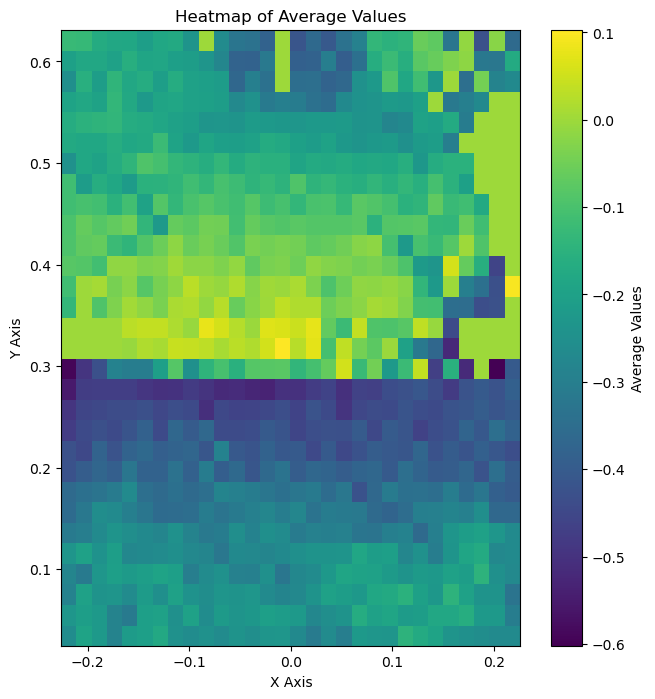

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 'all_rollouts' containing your data
# Assuming 'all_rollouts' is a list of objects with the structure as mentioned in your code

# Extract data for plotting
x_data = []
y_data = []
values = []

for i in range(100):
    for j in range(len(all_rollouts)):
        x_data.extend(all_rollouts[j].obs[0][:, :, i, 2].cpu().reshape(-1))
        y_data.extend(all_rollouts[j].obs[0][:, :, i, 3].cpu().reshape(-1))
        values.extend(all_rollouts[j].values[:, :, i].cpu().reshape(-1))

# Create a 2D histogram (heatmap)
nbins = 30
heatmap, xedges, yedges = np.histogram2d(x_data, y_data, bins=nbins, weights=values)

# Compute average values per bin
counts, _, _ = np.histogram2d(x_data, y_data, bins=nbins)
average_values = np.divide(heatmap, counts, where=counts != 0)

# Create the heatmap
plt.figure(figsize=(8, 8))
plt.imshow(average_values.T, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], origin='lower', cmap='viridis')
plt.colorbar(label='Average Values')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Heatmap of Average Values')
plt.show()

## A bit later in training

In [12]:
root_path = '/data/rl/madrona_3d_example/data_dump/default/'
all_rollouts = []
for file in all_files[50:60]:
    all_rollouts.append(torch.load(root_path + file))

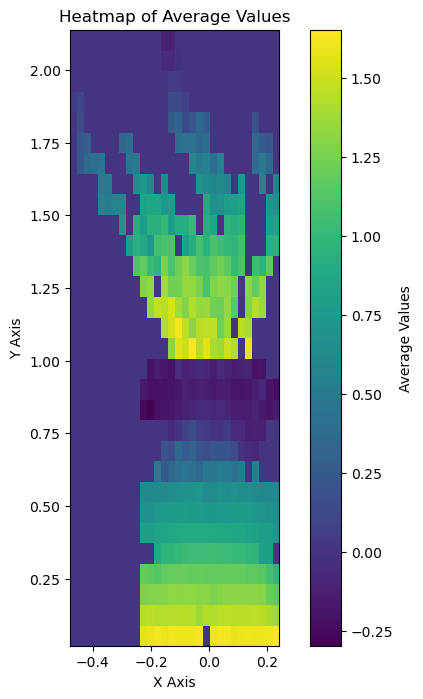

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 'all_rollouts' containing your data
# Assuming 'all_rollouts' is a list of objects with the structure as mentioned in your code

# Extract data for plotting
x_data = []
y_data = []
values = []

for i in range(100):
    for j in range(len(all_rollouts)):
        x_data.extend(all_rollouts[j].obs[0][:, :, i, 2].cpu().reshape(-1))
        y_data.extend(all_rollouts[j].obs[0][:, :, i, 3].cpu().reshape(-1))
        values.extend(all_rollouts[j].values[:, :, i].cpu().reshape(-1))

# Create a 2D histogram (heatmap)
nbins = 30
heatmap, xedges, yedges = np.histogram2d(x_data, y_data, bins=nbins, weights=values)

# Compute average values per bin
counts, _, _ = np.histogram2d(x_data, y_data, bins=nbins)
average_values = np.divide(heatmap, counts, where=counts != 0)

# Create the heatmap
plt.figure(figsize=(8, 8))
plt.imshow(average_values.T, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], origin='lower', cmap='viridis')
plt.colorbar(label='Average Values')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Heatmap of Average Values')
plt.show()

## Even later

In [14]:
root_path = '/data/rl/madrona_3d_example/data_dump/default/'
all_rollouts = []
for file in all_files[150:160]:
    all_rollouts.append(torch.load(root_path + file))

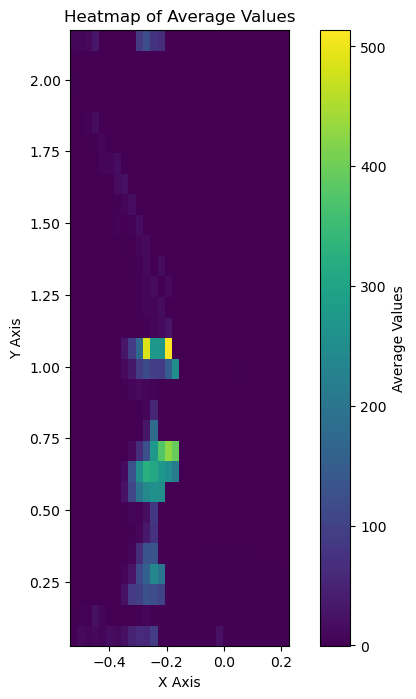

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 'all_rollouts' containing your data
# Assuming 'all_rollouts' is a list of objects with the structure as mentioned in your code

# Extract data for plotting
x_data = []
y_data = []
values = []

for i in range(100):
    for j in range(len(all_rollouts)):
        x_data.extend(all_rollouts[j].obs[0][:, :, i, 2].cpu().reshape(-1))
        y_data.extend(all_rollouts[j].obs[0][:, :, i, 3].cpu().reshape(-1))
        values.extend(all_rollouts[j].values[:, :, i].cpu().reshape(-1))

# Create a 2D histogram (heatmap)
nbins = 30
heatmap, xedges, yedges = np.histogram2d(x_data, y_data, bins=nbins, weights=values)

# Compute average values per bin
counts, _, _ = np.histogram2d(x_data, y_data, bins=nbins)
average_values = np.divide(heatmap, counts, where=counts != 0)

# Create the heatmap
plt.figure(figsize=(8, 8))
plt.imshow(average_values.T, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], origin='lower', cmap='viridis')
plt.colorbar(label='Average Values')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Heatmap of Average Values')
plt.show()

In [20]:
root_path = '/data/rl/madrona_3d_example/data_dump/default/'
all_files = sorted(os.listdir(root_path))
all_rollouts = []
for file in all_files[350:370]:
    all_rollouts.append(torch.load(root_path + file))

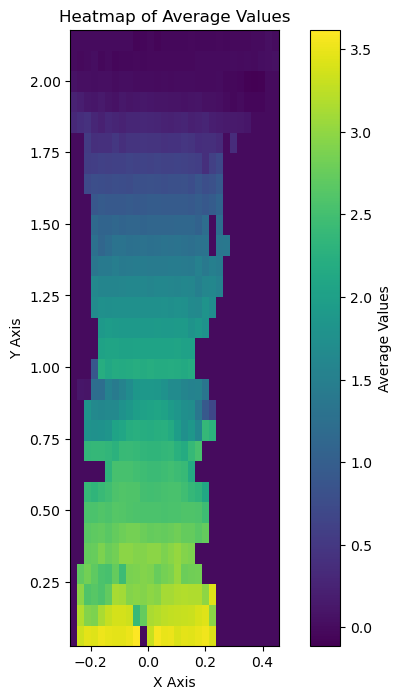

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 'all_rollouts' containing your data
# Assuming 'all_rollouts' is a list of objects with the structure as mentioned in your code

# Extract data for plotting
x_data = []
y_data = []
values = []

for i in range(100):
    for j in range(len(all_rollouts)):
        x_data.extend(all_rollouts[j].obs[0][:, :, i, 2].cpu().reshape(-1))
        y_data.extend(all_rollouts[j].obs[0][:, :, i, 3].cpu().reshape(-1))
        values.extend(all_rollouts[j].values[:, :, i].cpu().reshape(-1))

# Create a 2D histogram (heatmap)
nbins = 30
heatmap, xedges, yedges = np.histogram2d(x_data, y_data, bins=nbins, weights=values)

# Compute average values per bin
counts, _, _ = np.histogram2d(x_data, y_data, bins=nbins)
average_values = np.divide(heatmap, counts, where=counts != 0)

# Create the heatmap
plt.figure(figsize=(8, 8))
plt.imshow(average_values.T, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], origin='lower', cmap='viridis')
plt.colorbar(label='Average Values')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Heatmap of Average Values')
plt.show()

## Look at things conditional on door open/closed

In [28]:
root_path = '/data/rl/madrona_3d_example/data_dump/default/'
all_files = sorted(os.listdir(root_path))
all_rollouts = []
for file in all_files[350:370]:
    all_rollouts.append(torch.load(root_path + file))

In [35]:
all_rollouts[-1].obs[3][:,:,:,2].flatten() > 0.5

tensor([False, False,  True,  ..., False, False, False], device='cuda:0')

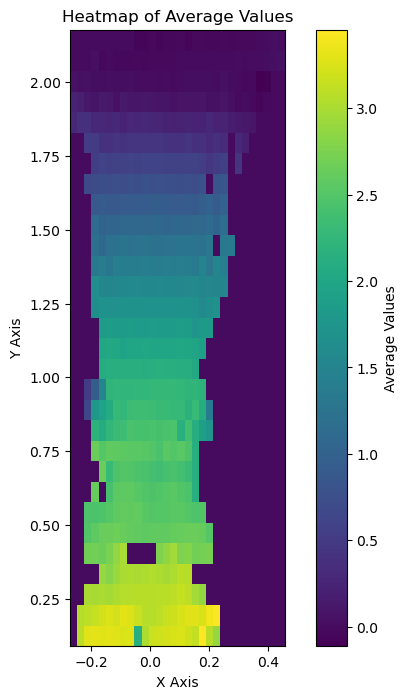

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 'all_rollouts' containing your data
# Assuming 'all_rollouts' is a list of objects with the structure as mentioned in your code

# Extract data for plotting
x_data = []
y_data = []
values = []

for i in range(100):
    for j in range(len(all_rollouts)):
        rollout_filter = all_rollouts[j].obs[3][:,:,i,2].flatten().cpu() > 0.5
        x_data.extend(all_rollouts[j].obs[0][:, :, i, 2].cpu().reshape(-1)[rollout_filter])
        y_data.extend(all_rollouts[j].obs[0][:, :, i, 3].cpu().reshape(-1)[rollout_filter])
        values.extend(all_rollouts[j].values[:, :, i].cpu().reshape(-1)[rollout_filter])

# Create a 2D histogram (heatmap)
nbins = 30
heatmap, xedges, yedges = np.histogram2d(x_data, y_data, bins=nbins, weights=values)

# Compute average values per bin
counts, _, _ = np.histogram2d(x_data, y_data, bins=nbins)
average_values = np.divide(heatmap, counts, where=counts != 0)

# Create the heatmap
plt.figure(figsize=(8, 8))
plt.imshow(average_values.T, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], origin='lower', cmap='viridis')
plt.colorbar(label='Average Values')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Heatmap of Average Values')
plt.show()

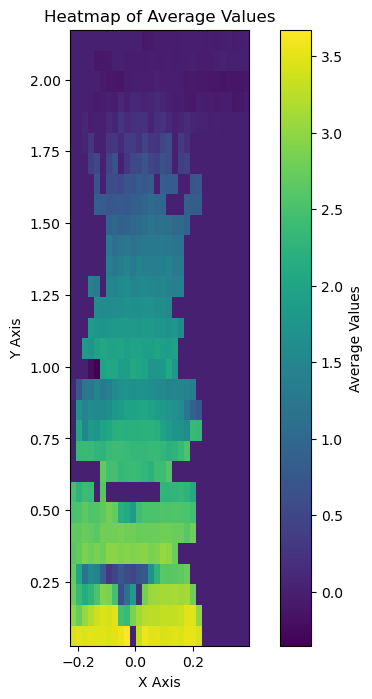

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 'all_rollouts' containing your data
# Assuming 'all_rollouts' is a list of objects with the structure as mentioned in your code

# Extract data for plotting
x_data = []
y_data = []
values = []

for i in range(100):
    for j in range(len(all_rollouts)):
        rollout_filter = all_rollouts[j].obs[3][:,:,i,2].flatten().cpu() < 0.5
        x_data.extend(all_rollouts[j].obs[0][:, :, i, 2].cpu().reshape(-1)[rollout_filter])
        y_data.extend(all_rollouts[j].obs[0][:, :, i, 3].cpu().reshape(-1)[rollout_filter])
        values.extend(all_rollouts[j].values[:, :, i].cpu().reshape(-1)[rollout_filter])

# Create a 2D histogram (heatmap)
nbins = 30
heatmap, xedges, yedges = np.histogram2d(x_data, y_data, bins=nbins, weights=values)

# Compute average values per bin
counts, _, _ = np.histogram2d(x_data, y_data, bins=nbins)
average_values = np.divide(heatmap, counts, where=counts != 0)

# Create the heatmap
plt.figure(figsize=(8, 8))
plt.imshow(average_values.T, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], origin='lower', cmap='viridis')
plt.colorbar(label='Average Values')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Heatmap of Average Values')
plt.show()

## Look at variance of values

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 'all_rollouts' containing your data
# Assuming 'all_rollouts' is a list of objects with the structure as mentioned in your code

root_path = '/data/rl/madrona_3d_example/data_dump/default/'
all_files = sorted(os.listdir(root_path))
all_rollouts = []
for file in all_files[350:370]:
    all_rollouts.append(torch.load(root_path + file))

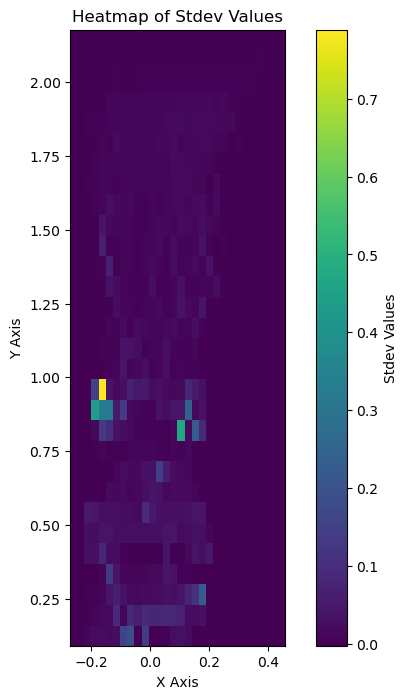

In [61]:
# Extract data for plotting
x_data = []
y_data = []
values = []
squared_values = []

for i in range(100):
    for j in range(len(all_rollouts)):
        rollout_filter = all_rollouts[j].obs[3][:,:,i,2].flatten().cpu() > 0.5
        x_data.extend(all_rollouts[j].obs[0][:, :, i, 2].cpu().reshape(-1)[rollout_filter])
        y_data.extend(all_rollouts[j].obs[0][:, :, i, 3].cpu().reshape(-1)[rollout_filter])
        values.extend(all_rollouts[j].values[:, :, i].cpu().reshape(-1)[rollout_filter])
        squared_values.extend(all_rollouts[j].values[:, :, i].cpu().reshape(-1)[rollout_filter]**2)

# Create a 2D histogram (heatmap)
nbins = 30
heatmap, xedges, yedges = np.histogram2d(x_data, y_data, bins=nbins, weights=values)
squared_heatmap, xedges, yedges = np.histogram2d(x_data, y_data, bins=nbins, weights=squared_values)

# Compute average values per bin
counts, _, _ = np.histogram2d(x_data, y_data, bins=nbins)
average_values = np.divide(heatmap, counts, where=counts != 0)
stdev_values = np.divide(squared_heatmap, counts, where=counts != 0) - average_values**2

# Create the heatmap
plt.figure(figsize=(8, 8))
plt.imshow(stdev_values.T, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], origin='lower', cmap='viridis')
plt.colorbar(label='Stdev Values')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Heatmap of Stdev Values')
plt.show()

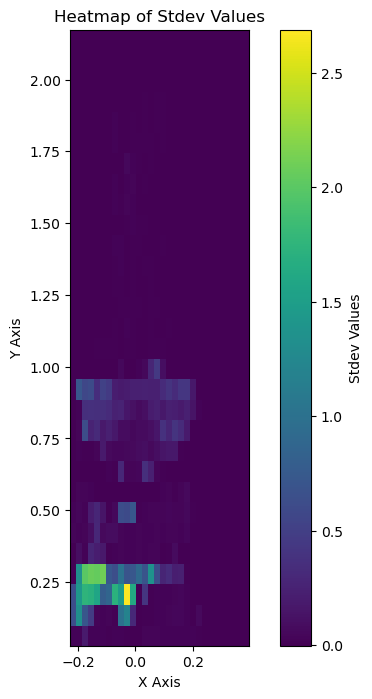

In [62]:
# Extract data for plotting
x_data = []
y_data = []
values = []
squared_values = []

for i in range(100):
    for j in range(len(all_rollouts)):
        rollout_filter = all_rollouts[j].obs[3][:,:,i,2].flatten().cpu() < 0.5
        x_data.extend(all_rollouts[j].obs[0][:, :, i, 2].cpu().reshape(-1)[rollout_filter])
        y_data.extend(all_rollouts[j].obs[0][:, :, i, 3].cpu().reshape(-1)[rollout_filter])
        values.extend(all_rollouts[j].values[:, :, i].cpu().reshape(-1)[rollout_filter])
        squared_values.extend(all_rollouts[j].values[:, :, i].cpu().reshape(-1)[rollout_filter]**2)

# Create a 2D histogram (heatmap)
nbins = 30
heatmap, xedges, yedges = np.histogram2d(x_data, y_data, bins=nbins, weights=values)
squared_heatmap, xedges, yedges = np.histogram2d(x_data, y_data, bins=nbins, weights=squared_values)

# Compute average values per bin
counts, _, _ = np.histogram2d(x_data, y_data, bins=nbins)
average_values = np.divide(heatmap, counts, where=counts != 0)
stdev_values = np.divide(squared_heatmap, counts, where=counts != 0) - average_values**2

# Create the heatmap
plt.figure(figsize=(8, 8))
plt.imshow(stdev_values.T, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], origin='lower', cmap='viridis')
plt.colorbar(label='Stdev Values')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Heatmap of Stdev Values')
plt.show()

## Now generate counts of absurd values

In [41]:
min_value = -0.005 * 200 # -0.005 when idle, 200 timesteps

In [44]:
max_value = 0.05 * 80 * 1.25 # 80 units, 1.25 bonus from nearby

In [43]:
print(min_value, max_value)

-1.0 5.0


In [51]:
root_path = '/data/rl/madrona_3d_example/data_dump/default/'
all_files = sorted(os.listdir(root_path))
all_rollouts = []
for i in range(0,len(all_files),10):
    print(i)
    all_values = []
    for file in all_files[i:i+10]:
        all_values.append(torch.load(root_path + file).values)
    all_values = torch.stack(all_values)
    print("Min value", all_values.min())
    print("Max value", all_values.max())
    print("Mean value", all_values.mean())
    print("Overestimate fraction", (all_values > max_value).float().mean())
    print("Underestimate fraction",(all_values < min_value).float().mean())

0
Min value tensor(-0.8779, device='cuda:0', dtype=torch.float16)
Max value tensor(0.3262, device='cuda:0', dtype=torch.float16)
Mean value tensor(-0.3162, device='cuda:0', dtype=torch.float16)
Overestimate fraction tensor(0., device='cuda:0')
Underestimate fraction tensor(0., device='cuda:0')
10
Min value tensor(-0.5024, device='cuda:0', dtype=torch.float16)
Max value tensor(0.7158, device='cuda:0', dtype=torch.float16)
Mean value tensor(-0.0467, device='cuda:0', dtype=torch.float16)
Overestimate fraction tensor(0., device='cuda:0')
Underestimate fraction tensor(0., device='cuda:0')
20
Min value tensor(-0.5498, device='cuda:0', dtype=torch.float16)
Max value tensor(0.6069, device='cuda:0', dtype=torch.float16)
Mean value tensor(-0.2019, device='cuda:0', dtype=torch.float16)
Overestimate fraction tensor(0., device='cuda:0')
Underestimate fraction tensor(0., device='cuda:0')
30
Min value tensor(-0.5981, device='cuda:0', dtype=torch.float16)
Max value tensor(1.5479, device='cuda:0', dtyp

# Try all this with one of the failed runs

In [65]:
root_path = '/data/rl/madrona_3d_example/data_dump/no_adv_norm/'
all_files = sorted(os.listdir(root_path))
all_rollouts = []
for file in all_files[350:351]:
    all_rollouts.append(torch.load(root_path + file))

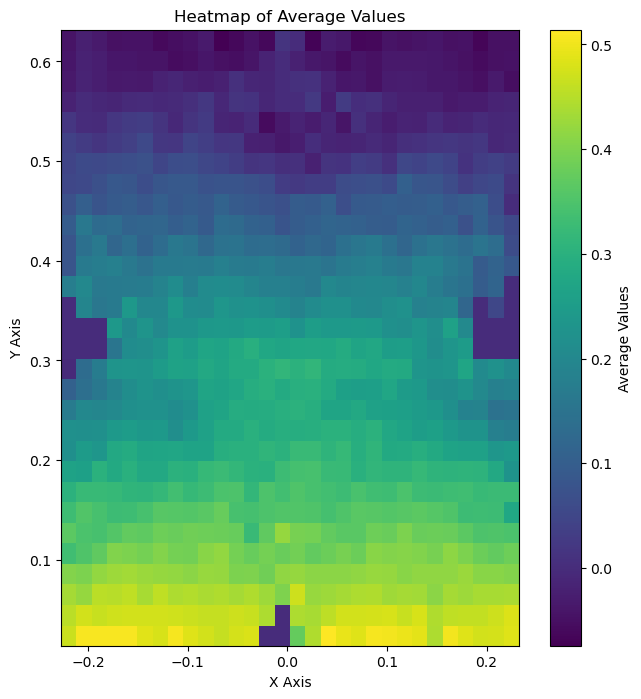

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 'all_rollouts' containing your data
# Assuming 'all_rollouts' is a list of objects with the structure as mentioned in your code

# Extract data for plotting
x_data = []
y_data = []
values = []

for i in range(100):
    for j in range(len(all_rollouts)):
        x_data.extend(all_rollouts[j].obs[0][:, :, i, 2].cpu().reshape(-1))
        y_data.extend(all_rollouts[j].obs[0][:, :, i, 3].cpu().reshape(-1))
        values.extend(all_rollouts[j].values[:, :, i].cpu().reshape(-1))

# Create a 2D histogram (heatmap)
nbins = 30
heatmap, xedges, yedges = np.histogram2d(x_data, y_data, bins=nbins, weights=values)

# Compute average values per bin
counts, _, _ = np.histogram2d(x_data, y_data, bins=nbins)
average_values = np.divide(heatmap, counts, where=counts != 0)

# Create the heatmap
plt.figure(figsize=(8, 8))
plt.imshow(average_values.T, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], origin='lower', cmap='viridis')
plt.colorbar(label='Average Values')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Heatmap of Average Values')
plt.show()

In [ ]:
## Now 

In [77]:
print("hi")

hi


# Export data to json for D3

In [79]:
root_path = '/data/rl/madrona_3d_example/data_dump/default/'
all_files = sorted(os.listdir(root_path))
all_rollouts = []
k = 0
for file in all_files[::30]:
    print(k)
    rollouts = torch.load(root_path + file)
    num_trajectories = 100
    len_rollout = 40
    
    trajectories_data = []
    
    values = rollouts.values.cpu().reshape((len_rollout, -1))
    positions = rollouts.obs[0].cpu().reshape((len_rollout, -1, rollouts.obs[0].shape[-1]))
    
    for i in range(num_trajectories):
        trajectory = []
        for j in range(len_rollout):
            x = positions[j, i, 2]
            y = positions[j, i, 3]
            value = values[j, i]
            trajectory.append({"x": float(x), "y": float(y), "value": float(value)})
        trajectories_data.append(trajectory)

    trajectories_json = json.dumps(trajectories_data)
    with open("visualization/test_run/" + str(k) + ".json", "w") as json_file:
        json_file.write(trajectories_json)

    k += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


In [ ]:
# Extract data for plotting
x_data = []
y_data = []
values = []

for i in range(100):
    for j in range(len(all_rollouts)):
        x_data.extend(all_rollouts[j].obs[0][:, :, i, 2].cpu().reshape(-1))
        y_data.extend(all_rollouts[j].obs[0][:, :, i, 3].cpu().reshape(-1))
        values.extend(all_rollouts[j].values[:, :, i].cpu().reshape(-1))

In [69]:
all_rollouts[0].obs[0].shape

torch.Size([8, 5, 16384, 8])

In [71]:
num_trajectories = 100
len_rollout = 40

trajectories_data = []

values = all_rollouts[0].values.cpu().reshape((len_rollout, -1))
positions = all_rollouts[0].obs[0].cpu().reshape((len_rollout, -1, all_rollouts[0].obs[0].shape[-1]))

print(values.shape, positions.shape)

for i in range(num_trajectories):
    trajectory = []
    for j in range(len_rollout):
        x = positions[j, i, 2]
        y = positions[j, i, 3]
        value = values[j, i]
        trajectory.append({"x": float(x), "y": float(y), "value": float(value)})
    trajectories_data.append(trajectory)

torch.Size([40, 16384]) torch.Size([40, 16384, 8])


In [75]:
import json
trajectories_json = json.dumps(trajectories_data)

In [76]:
with open("trajectories.json", "w") as json_file:
    json_file.write(trajectories_json)

In [83]:
for property, value in vars(rollouts).items():
    print(property)

obs
actions
log_probs
dones
rewards
returns
values
bootstrap_values
rnn_start_states


In [ ]:
rollouts = torch.load(root_path + file)

In [94]:
rollouts.rewards[:,:,0].reshape(-1)

tensor([ 0.0335,  0.0624,  0.0209,  0.0194,  0.0040,  0.0379,  0.0272,  0.0427,
         0.0132,  0.0381,  0.0186, -0.0050,  0.0516,  0.0164,  0.0583,  0.0398,
         0.0234,  0.0192,  0.0534,  0.0178,  0.0182,  0.0408,  0.0207,  0.0322,
         0.0066,  0.0499,  0.0496,  0.0486,  0.0419,  0.0272,  0.0224,  0.0446,
         0.0197,  0.0417,  0.0589,  0.0119,  0.0127,  0.0176,  0.0137,  0.0356],
       device='cuda:0', dtype=torch.float16)

In [91]:
rollouts.returns[:,:,0].reshape(-1)

tensor([3.6562, 2.4824, 2.5449, 2.5664, 2.5859, 2.5898, 2.6270, 2.6543, 2.6973,
        2.7109, 2.7480, 2.7676, 2.7617, 2.8145, 2.8301, 2.8887, 2.9277, 2.9512,
        2.9707, 3.0234, 3.0430, 3.0605, 3.1016, 3.1211, 3.1543, 3.1602, 3.2109,
        3.2598, 3.3086, 3.3516, 3.3770, 3.4004, 3.4453, 3.4648, 3.5059, 3.5645,
        3.5762, 3.5898, 3.6074, 3.6211], device='cuda:0', dtype=torch.float16)

In [95]:
rollouts.values[:,:,0].reshape(-1)

tensor([2.0176, 1.9883, 1.9248, 1.9443, 1.9229, 1.9395, 1.9424, 1.9131, 1.8633,
        1.7969, 1.7920, 1.8086, 1.8076, 1.7773, 1.7461, 1.6797, 1.6465, 1.6104,
        1.6396, 1.5752, 1.5488, 1.5049, 1.4932, 1.4863, 1.4609, 1.4609, 1.4092,
        1.3691, 1.3291, 1.2490, 1.2686, 1.2031, 1.2080, 1.1934, 1.0811, 1.0508,
        1.0410, 1.0420, 1.0518, 1.0342], device='cuda:0', dtype=torch.float16)

## We probably want to make this interactive/per individual map or something